In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as py
import seaborn as sns

%matplotlib inline

                        ####################           import data             ####################

df = pd.read_excel('22_ishuvim.xlsx')  # 22 election
df21 = pd.read_excel('expc (4).xlsx')  # 21 election


In [2]:
df.head()

סמל ועדה             שם ישוב  סמל ישוב   בזב  מצביעים  פסולים  כשרים  אמת  \
0        18  אבו ג'ווייעד (שבט)       967  1961      542       9    533    3   
1         2             אבו גוש       472  4760     2459      53   2406   40   
2         6            אבו סנאן       473  9327     5667      50   5617   88   
3        18     אבו עבדון (שבט)       958   139       47       1     46    0   
4        18   אבו קורינאת (שבט)       968  2979     1222      13   1209   15   

   ג  ודעם  ...   פה  ףז  צ  צן  ץ  ק  קך  קץ  רק   שס  
0  1   498  ...   22   0  0   0  0  3   1   0   0    0  
1  5  1732  ...  295   4  2   1  1  3   2   5   3   52  
2  4  3759  ...  802   0  3   3  0  8   6   4   3  227  
3  0    45  ...    1   0  0   0  0  0   0   0   0    0  
4  0  1091  ...   60   1  0   0  1  1   1   3   0    5  

[5 rows x 39 columns]

In [3]:
sum_elc = df['כשרים'].sum()

In [4]:
####################           Deletion of parties that received no more than one percent of the vote      ####################

df.drop(['סמל ועדה'],axis=1,inplace =True)
df.set_index('שם ישוב',inplace = True)
df.drop(df.columns[df.apply(lambda col: col.sum() < (sum_elc/100))], axis=1,inplace = True)

sum_elc21 = df21['כשרים'].sum()
df21.set_index('שם ישוב',inplace = True)
df21.drop(df21.columns[df21.apply(lambda col: col.sum() < (sum_elc21/100))], axis=1,inplace = True)

In [5]:
df.head()

סמל ישוב   בזב  מצביעים  כשרים  אמת  ג  ודעם  טב  כף    ל  \
שם ישוב                                                                         
אבו ג'ווייעד (שבט)       967  1961      542    533    3  1   498   0   0    0   
אבו גוש                  472  4760     2459   2406   40  5  1732   2   4   12   
אבו סנאן                 473  9327     5667   5617   88  4  3759   6   3  381   
אבו עבדון (שבט)          958   139       47     46    0  0    45   0   0    0   
אבו קורינאת (שבט)        968  2979     1222   1209   15  0  1091   2   0    2   

                    מחל  מרצ   פה   שס  
שם ישוב                                 
אבו ג'ווייעד (שבט)    3    0   22    0  
אבו גוש             115   82  295   52  
אבו סנאן            224   55  802  227  
אבו עבדון (שבט)       0    0    1    0  
אבו קורינאת (שבט)    10    6   60    5

In [6]:
#    הגדרת הגושים והוספה לטבלאות של מפלגות שלא השתתפו בשתי מערכות הבחירות
gush_yamin = ['ג','שס','מחל','ל','נ','טב','ז','כ','כף']
gush_bibi =  ['ג','שס','מחל','נ','טב','ז','כ','כף']
gush_left = ['פה','אמת','מרצ','ודעם','דעם','ום','נר']
gush_aravim = ['ודעם','דעם','ום']
df21['כף'] = df['ל']*0
df['נ'] = df['ל']*0
df['נר'] = df['ל']*0
df21['ודעם'] = df['ל']*0
df['כ'] = df['ל']*0
df['ום'] = df['ל']*0
df['ז'] = df['ל']*0
df['דעם'] = df['ל']*0

In [7]:
sum_yamin21 = df21[gush_yamin].sum()

In [8]:
sum_yamin22 = df[gush_yamin].sum()

In [9]:
sum_bibi21 = df21[gush_bibi].sum()
sum_bibi22 = df[gush_bibi].sum()
sum_left21 = df21[gush_left].sum()
sum_left22 = df[gush_left].sum()
sum_aravim21 = df21[gush_aravim].sum()
sum_aravim22 = df[gush_aravim].sum()


In [10]:
merg_df = pd.merge(df21,df,how='inner',on='סמל ישוב',suffixes=('_21', '_22'),)

In [11]:
merg_df.drop(merg_df.columns[merg_df.apply(lambda col: col.sum() == 0)], axis=1,inplace = True)

In [12]:
merg_df

סמל ישוב  בזב_21  מצביעים_21  כשרים_21  אמת_21  ג_21  דעם_21  ום_21  \
0            7     516         371       371      17     2       0      0   
1           10     333         237       235       4     3       0      0   
2           11     403         289       288      21     0       0      0   
3           13     502         403       403      44     2       0      0   
4           15     302         217       215       1     4       0      0   
...        ...     ...         ...       ...     ...   ...     ...    ...   
1207      9400   23080       17210     17137     923   108       3     13   
1208      9500   34220       22168     22011     925   214       3      9   
1209      9600   36506       21114     20887     450   123       7      6   
1210      9700   45512       34904     34800    2652   154       6     38   
1211      9800   10073        7652      7625     745    13       6     18   

      ז_21  טב_21  ...  אמת_22  ג_22  ודעם_22  טב_22  כף_22  ל_22  מחל_22  \
0        8      3  ...      31     8        0     28      3    11     128   
1        1     10  ...       1     4        0     11      4     0      93   
2       11      4  ...      32     1        1     13      5    10      57   
3       16      5  ...      24     2        0     17      4    18      25   
4        2      5  ...       1     4        0      8      4     1     158   
...    ...    ...  ...     ...   ...      ...    ...    ...   ...     ...   
1207   414    231  ...    1142   152       17    675    252   769    5785   
1208   611    167  ...    1217   237       19    574    200  2588    7385   
1209   669    242  ...     708   157       13    525    241  4440    8626   
1210   669    301  ...    2592   126       59    978    229  1583    6954   
1211   150     95  ...     640    17       25    313     52   276    1404   

      מרצ_22  פה_22  שס_22  
0         13     98     39  
1          1      6    104  
2          5     94      4  
3         32    216      1  
4          0     13     36  
...      ...    ...    ...  
1207     608   6914    699  
1208     442   8097    714  
1209     180   4535    909  
1210    2701  18294    858  
1211     886   3746    118  

[1212 rows x 31 columns]

In [13]:
df['אחוז הצבעה'] = df['כשרים']/df['בזב']*100
df21['אחוז הצבעה'] = df21['כשרים']/df21['בזב']*100

In [14]:
df_analize = df.copy()*0

In [15]:
df_analize

סמל ישוב  בזב  מצביעים  כשרים  אמת  ג  ודעם  טב  כף  ל  \
שם ישוב                                                                       
אבו ג'ווייעד (שבט)          0    0        0      0    0  0     0   0   0  0   
אבו גוש                     0    0        0      0    0  0     0   0   0  0   
אבו סנאן                    0    0        0      0    0  0     0   0   0  0   
אבו עבדון (שבט)             0    0        0      0    0  0     0   0   0  0   
אבו קורינאת (שבט)           0    0        0      0    0  0     0   0   0  0   
...                       ...  ...      ...    ...  ... ..   ...  ..  .. ..   
תקומה                       0    0        0      0    0  0     0   0   0  0   
תקוע                        0    0        0      0    0  0     0   0   0  0   
תראבין א-צאנע (שבט)         0    0        0      0    0  0     0   0   0  0   
תראבין א-צאנע(ישוב)         0    0        0      0    0  0     0   0   0  0   
תרום                        0    0        0      0    0  0     0   0   0  0   

                     ...  מרצ  פה  שס  נ  נר  כ  ום  ז  דעם  אחוז הצבעה  
שם ישוב              ...                                                 
אבו ג'ווייעד (שבט)   ...    0   0   0  0   0  0   0  0    0         0.0  
אבו גוש              ...    0   0   0  0   0  0   0  0    0         0.0  
אבו סנאן             ...    0   0   0  0   0  0   0  0    0         0.0  
אבו עבדון (שבט)      ...    0   0   0  0   0  0   0  0    0         0.0  
אבו קורינאת (שבט)    ...    0   0   0  0   0  0   0  0    0         0.0  
...                  ...  ...  ..  .. ..  .. ..  .. ..  ...         ...  
תקומה                ...    0   0   0  0   0  0   0  0    0         0.0  
תקוע                 ...    0   0   0  0   0  0   0  0    0         0.0  
תראבין א-צאנע (שבט)  ...    0   0   0  0   0  0   0  0    0         0.0  
תראבין א-צאנע(ישוב)  ...    0   0   0  0   0  0   0  0    0         0.0  
תרום                 ...    0   0   0  0   0  0   0  0    0         0.0  

[1214 rows x 21 columns]

In [16]:
df.sort_index(inplace=True)
df.sort_index(axis =1, inplace =True)
df21.sort_index(axis =1, inplace =True)

df21.sort_index(inplace=True)
df.head()



אחוז הצבעה  אמת   בזב  ג  דעם  ודעם  ום  ז  טב  כ  ...  \
שם ישוב                                                                ...   
אבו ג'ווייעד (שבט)   27.180010    3  1961  1    0   498   0  0   0  0  ...   
אבו גוש              50.546218   40  4760  5    0  1732   0  0   2  0  ...   
אבו סנאן             60.223008   88  9327  4    0  3759   0  0   6  0  ...   
אבו עבדון (שבט)      33.093525    0   139  0    0    45   0  0   0  0  ...   
אבו קורינאת (שבט)    40.584089   15  2979  0    0  1091   0  0   2  0  ...   

                    כשרים    ל  מחל  מצביעים  מרצ  נ  נר  סמל ישוב   פה   שס  
שם ישוב                                                                       
אבו ג'ווייעד (שבט)    533    0    3      542    0  0   0       967   22    0  
אבו גוש              2406   12  115     2459   82  0   0       472  295   52  
אבו סנאן             5617  381  224     5667   55  0   0       473  802  227  
אבו עבדון (שבט)        46    0    0       47    0  0   0       958    1    0  
אבו קורינאת (שבט)    1209    2   10     1222    6  0   0       968   60    5  

[5 rows x 21 columns]

In [17]:
df21.head()

אחוז הצבעה  אמת   בזב  ג  דעם  ודעם    ום  ז  טב    כ  \
שם ישוב                                                                     
אבו ג'ווייעד (שבט)   14.099217    5  1915  0  175   0.0    13  1   0    1   
אבו גוש              39.154451   35  4707  2  368   0.0   490  2  11   14   
אבו סנאן             51.581113   60  9234  6  592   0.0  2152  2   4  515   
אבו עבדון (שבט)       8.695652    0   138  0    2   0.0     3  0   0    0   
אבו קורינאת (שבט)    21.489580    8  2927  0  433   0.0    34  0   3    1   

                    ...  כשרים    ל  מחל  מצביעים  מרצ  נ  נר  סמל ישוב   פה  \
שם ישוב             ...                                                        
אבו ג'ווייעד (שבט)  ...    270    0    2      275   10  3   0       967   50   
אבו גוש             ...   1843   10  201     1915  313  1   6       472  334   
אבו סנאן            ...   4763  183  142     4845  187  7   3       473  701   
אבו עבדון (שבט)     ...     12    0    0       12    5  0   0       958    0   
אבו קורינאת (שבט)   ...    629    2    8      640   22  1   1       968   91   

                    שס  
שם ישוב                 
אבו ג'ווייעד (שבט)   0  
אבו גוש             30  
אבו סנאן            62  
אבו עבדון (שבט)      0  
אבו קורינאת (שבט)    2  

[5 rows x 21 columns]

df21

In [18]:
#   יצירת טבלה שמנתחת את ההבדלים בין שתי מערכות הבחירות לפי מספר הקולות שקיבלה כל מפלגה בכל ישוב
for column in df.columns[:]:
    col = column                
    df_analize[col] = ( df[col] - df21[col])

In [19]:
df_analize.head()

סמל ישוב   בזב  מצביעים  כשרים   אמת    ג    ודעם   טב  \
שם ישוב                                                                      
אבו ג'ווייעד (שבט)       0.0  46.0    267.0  263.0  -2.0  1.0   498.0  0.0   
אבו גוש                  0.0  53.0    544.0  563.0   5.0  3.0  1732.0 -9.0   
אבו סנאן                 0.0  93.0    822.0  854.0  28.0 -2.0  3759.0  2.0   
אבו עבדון (שבט)          0.0   1.0     35.0   34.0   0.0  0.0    45.0  0.0   
אבו קורינאת (שבט)        0.0  52.0    582.0  580.0   7.0  0.0  1091.0 -1.0   

                     כף      ל  ...    מרצ     פה     שס    נ   נר      כ  \
שם ישוב                         ...                                         
אבו ג'ווייעד (שבט)  0.0    0.0  ...  -10.0  -28.0    0.0 -3.0  0.0   -1.0   
אבו גוש             4.0    2.0  ... -231.0  -39.0   22.0 -1.0 -6.0  -14.0   
אבו סנאן            3.0  198.0  ... -132.0  101.0  165.0 -7.0 -3.0 -515.0   
אבו עבדון (שבט)     0.0    0.0  ...   -5.0    1.0    0.0  0.0  0.0    0.0   
אבו קורינאת (שבט)   0.0    0.0  ...  -16.0  -31.0    3.0 -1.0 -1.0   -1.0   

                        ום    ז    דעם  אחוז הצבעה  
שם ישוב                                             
אבו ג'ווייעד (שבט)   -13.0 -1.0 -175.0   13.080793  
אבו גוש             -490.0 -2.0 -368.0   11.391768  
אבו סנאן           -2152.0 -2.0 -592.0    8.641895  
אבו עבדון (שבט)       -3.0  0.0   -2.0   24.397873  
אבו קורינאת (שבט)    -34.0  0.0 -433.0   19.094509  

[5 rows x 21 columns]

In [20]:
df22_percent = df.copy()*1
df22_percent.head()

אחוז הצבעה  אמת   בזב  ג  דעם  ודעם  ום  ז  טב  כ  ...  \
שם ישוב                                                                ...   
אבו ג'ווייעד (שבט)   27.180010    3  1961  1    0   498   0  0   0  0  ...   
אבו גוש              50.546218   40  4760  5    0  1732   0  0   2  0  ...   
אבו סנאן             60.223008   88  9327  4    0  3759   0  0   6  0  ...   
אבו עבדון (שבט)      33.093525    0   139  0    0    45   0  0   0  0  ...   
אבו קורינאת (שבט)    40.584089   15  2979  0    0  1091   0  0   2  0  ...   

                    כשרים    ל  מחל  מצביעים  מרצ  נ  נר  סמל ישוב   פה   שס  
שם ישוב                                                                       
אבו ג'ווייעד (שבט)    533    0    3      542    0  0   0       967   22    0  
אבו גוש              2406   12  115     2459   82  0   0       472  295   52  
אבו סנאן             5617  381  224     5667   55  0   0       473  802  227  
אבו עבדון (שבט)        46    0    0       47    0  0   0       958    1    0  
אבו קורינאת (שבט)    1209    2   10     1222    6  0   0       968   60    5  

[5 rows x 21 columns]

In [21]:
# תןצאות הבחירות לפי אחוזים שקיבלה כל מפלגה בכל ישוב

for col in df22_percent.columns:
    if col != 'בזב' and col != 'כשרים'and col != 'מצביעים' and col != 'אחוז הצבעה':
        df22_percent[col] = df22_percent[col]/df22_percent['כשרים']*100

In [22]:
# תןצאות הבחירות לפי אחוזים שקיבלה כל מפלגה בכל ישוב
df21_percent = df21.copy()
for col in df21_percent.columns:
    if col != 'בזב' and col != 'כשרים'and col != 'מצביעים' and col != 'אחוז הצבעה':
        df21_percent[col] = df21_percent[col]/df21_percent['כשרים']*100

In [23]:
#   יצירת טבלה שמנתחת את ההבדלים בין שתי מערכות הבחירות לפי אחוזים שקיבלה כל מפלגה בכל ישוב

df_analize_per = df21.copy()
for col in df.columns:
    if col != 'בזב' and col != 'כשרים'and col != 'מצביעים' and col != 'אחוז הצבעה':
        df_analize_per[col] = df22_percent[col] - df21_percent[col] 

In [24]:
df_analize_per.head()

אחוז הצבעה       אמת   בזב         ג        דעם  \
שם ישוב                                                               
אבו ג'ווייעד (שבט)   14.099217 -1.289000  1915  0.187617 -64.814815   
אבו גוש              39.154451 -0.236567  4707  0.099295 -19.967444   
אבו סנאן             51.581113  0.306962  9234 -0.054759 -12.429141   
אבו עבדון (שבט)       8.695652  0.000000   138  0.000000 -16.666667   
אבו קורינאת (שבט)    21.489580 -0.031165  2927  0.000000 -68.839428   

                         ודעם         ום         ז        טב          כ  ...  \
שם ישוב                                                                  ...   
אבו ג'ווייעד (שבט)  93.433396  -4.814815 -0.370370  0.000000  -0.370370  ...   
אבו גוש             71.986700 -26.587086 -0.108519 -0.513727  -0.759631  ...   
אבו סנאן            66.921844 -45.181608 -0.041990  0.022838 -10.812513  ...   
אבו עבדון (שבט)     97.826087 -25.000000  0.000000  0.000000   0.000000  ...   
אבו קורינאת (שבט)   90.239868  -5.405405  0.000000 -0.311522  -0.158983  ...   

                    כשרים         ל       מחל  מצביעים        מרצ         נ  \
שם ישוב                                                                       
אבו ג'ווייעד (שבט)    270  0.000000 -0.177889      275  -3.703704 -1.111111   
אבו גוש              1843 -0.043840 -6.126414     1915 -13.575033 -0.054259   
אבו סנאן             4763  2.940864  1.006580     4845  -2.946927 -0.146966   
אבו עבדון (שבט)        12  0.000000  0.000000       12 -41.666667  0.000000   
אבו קורינאת (שבט)     629 -0.152539 -0.444730      640  -3.001337 -0.158983   

                          נר     סמל ישוב         פה        שס  
שם ישוב                                                         
אבו ג'ווייעד (שבט)  0.000000  -176.722257 -14.390939  0.000000  
אבו גוש            -0.325556    -5.992795  -5.861612  0.533483  
אבו סנאן           -0.062986    -1.509851  -0.439531  2.739603  
אבו עבדון (שבט)     0.000000 -5900.724638   2.173913  0.000000  
אבו קורינאת (שבט)  -0.158983   -73.828901  -9.504629  0.095600  

[5 rows x 21 columns]

In [25]:
#  סיווג קלפיות למעוזים לפי המפלגה או הגוש שקיבלו יותר מ50% מהקולות בישוב ברמה הראשונה
#  וברמה השניה לפי מפלגה שקיבלה למעלה מ30% מהקולות בישוב ( לפי סיווג זה יתכנו כפילויות )

In [26]:
maoz_licud =df21[df21_percent['מחל']>50]

In [27]:
maoz_kahol =df21[df21_percent['פה']>50]

In [28]:
maoz_aravim22 = df[df22_percent['ודעם']>50]
maoz_aravim = df[df22_percent['ודעם']>50]

In [29]:
maoz_zionutdatit = df21[(df21_percent['טב' ] + df21_percent['נ'])>50]
maoz_haredim = df21[(df21_percent['שס' ] + df21_percent['ג'])>50]
maoz_zionutdatit22 = df[(df22_percent['טב' ] + df22_percent['כף'])>50]
maoz_haredim22 = df[(df22_percent['שס' ] + df22_percent['ג'])>50]
maoz_kahol22 = df[( df22_percent['פה'])>50]
maoz_licud22 = df[(df22_percent['מחל' ] )>50]
maoz_aravim21 = df21[(df21_percent['ום' ] + df21_percent['דעם'])>50]


maoz2_zionutdatit = df21[(df21_percent['טב' ] + df21_percent['נ'])>30]
maoz2_haredim = df21[(df21_percent['שס' ] + df21_percent['ג'])>30]
maoz2_zionutdatit22 = df[(df22_percent['טב' ] + df22_percent['כף'])>30]
maoz2_haredim22 = df[(df22_percent['שס' ] + df22_percent['ג'])>30]
maoz2_kahol22 = df[( df22_percent['פה'])>30]
maoz2_licud22 = df[(df22_percent['מחל' ] )>30]
maoz2_aravim21 = df21[(df21_percent['ום' ] + df21_percent['דעם'])>30]
maoz2_aravim22 = df[df22_percent['ודעם']>30]
maoz2_licud =df21[df21_percent['מחל']>30]
maoz2_kahol =df21[df21_percent['פה']>30]

In [30]:
# maoz_licud.sort_values('מחל',ascending = False,inplace=True)

In [31]:
# maoz_kahol.sort_values('פה',ascending = False,inplace=True)
# # maoz_aravim.sort_values('ודעם',ascending = False,inplace=True)
# maoz_haredim.sort_values('ג',ascending = False,inplace=True)
# maoz_zionutdatit.sort_values('טב',ascending = False,inplace=True)

C:\Users\Owner\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



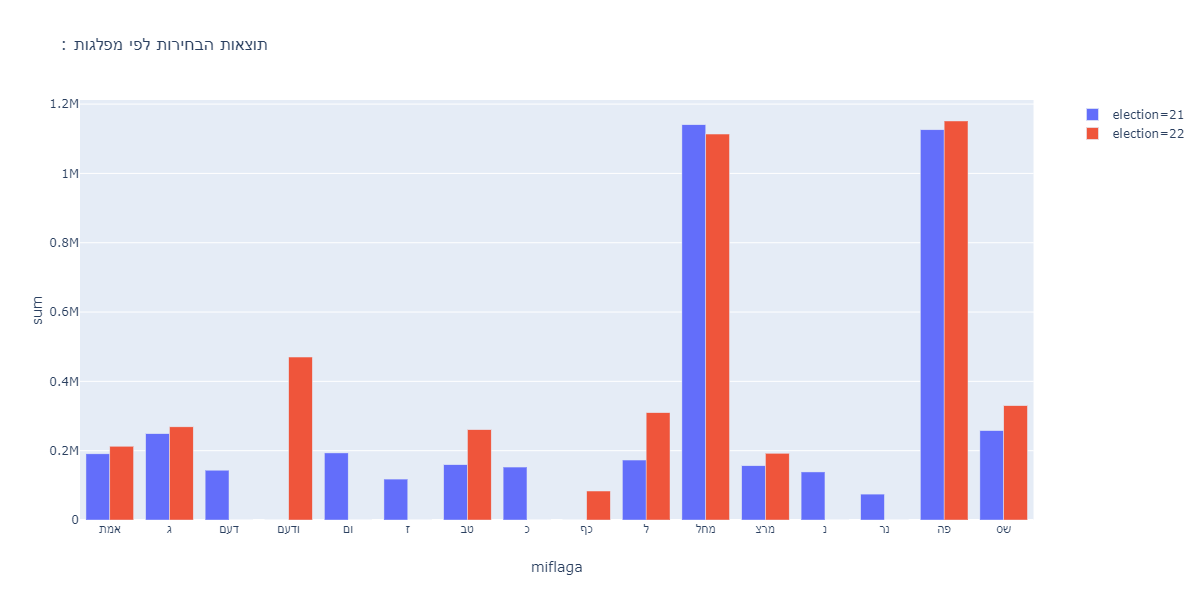

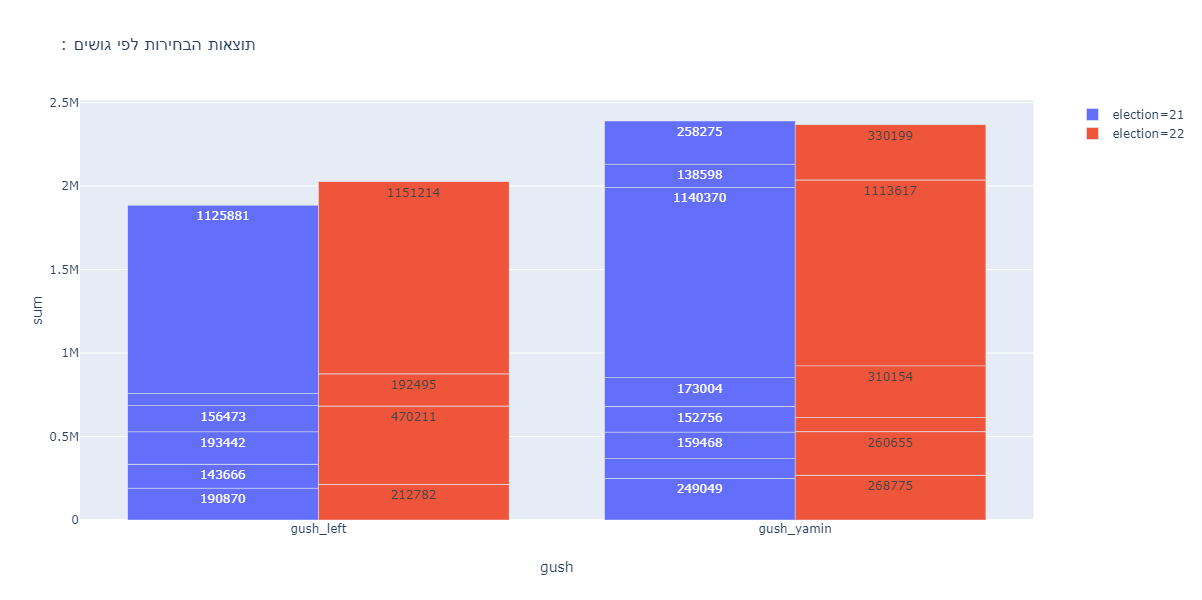

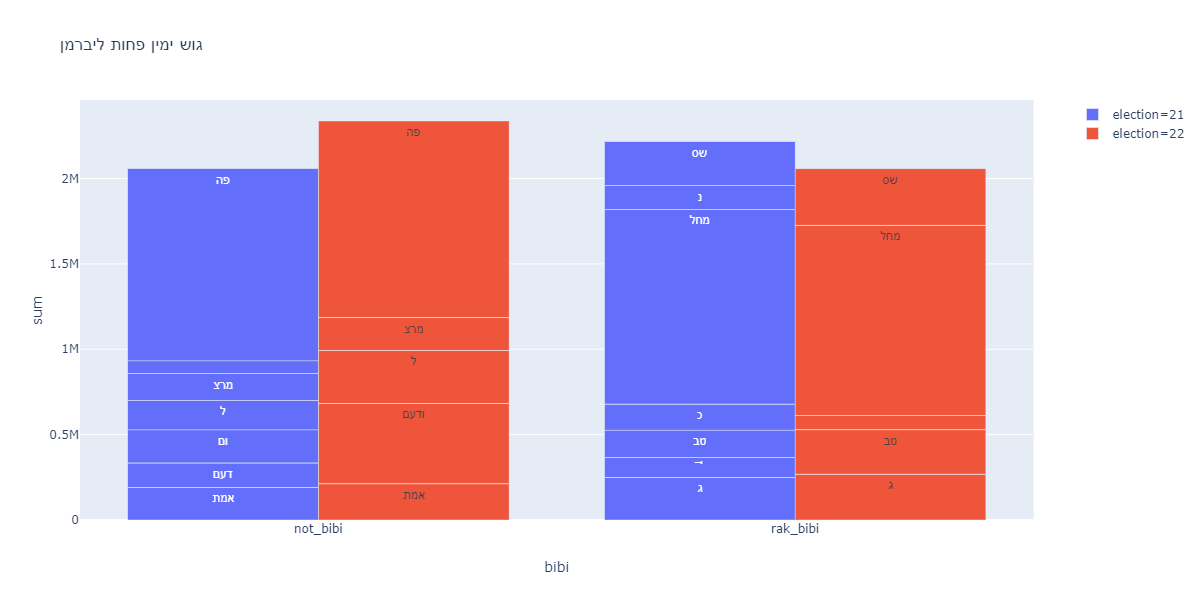

In [32]:
 ## ניתוח  ההבדלים שבין מערכות הבחירות 
sum22 = pd.DataFrame()
sum22['election']=22
sum22['gush']=22
sum22['bibi']=22
sum22['sum'] = pd.concat([df21.sum().drop(['אחוז הצבעה','בזב','סמל ישוב','מצביעים','כשרים']),df.sum().drop(['אחוז הצבעה','בזב','סמל ישוב','מצביעים','כשרים'])])
sum22['miflaga' ] =sum22.index

for i in range(0,32):
    if sum22['miflaga'].iloc[i] in gush_yamin: sum22['gush'].iloc[i] = 'gush_yamin'
    elif sum22['miflaga'].iloc[i] in gush_left: sum22['gush'].iloc[i] = 'gush_left'
    if sum22['miflaga'].iloc[i] in gush_bibi: sum22['bibi'].iloc[i] = 'rak_bibi'
    else: sum22['bibi'].iloc[i] = 'not_bibi'
    if i<=15 :sum22['election'].iloc[i]=  '21'
    else :sum22['election'].iloc[i]=  '22'
# sum22['שינוי'] = df_analize.sum()
sum22.reset_index()

fig = px.bar(sum22, x='miflaga', y="sum",color = 'election',  barmode="group" #,facet_row = 'election' 
#              category_orders={"day": ["Thur", "Fri", "Sat", "Sun"],
#                               "time": ["Lunch", "Dinner"]}
          ,title = ' : תוצאות הבחירות לפי מפלגות'  )
fig.show()

fig = px.bar(sum22, x='gush', y="sum",color = 'election',  barmode="group" #,facet_row = 'election' 
#              category_orders={"day": ["Thur", "Fri", "Sat", "Sun"],
#                               "time": ["Lunch", "Dinner"]}
       ,hover_name = 'sum'
             ,text = 'sum' 
             ,title = ': תוצאות הבחירות לפי גושים  '   )
fig.show()

fig = px.bar(sum22, x='bibi', y="sum",color = 'election',  barmode="group" #,facet_row = 'election' 
#              category_orders={"day": ["Thur", "Fri", "Sat", "Sun"],
#                               "time": ["Lunch", "Dinner"]}
         ,hover_name = 'sum' 
             ,text = 'miflaga', title = ' גוש ימין פחות ליברמן'    )
fig.show()



In [33]:
sum22.head()

election        gush      bibi       sum miflaga
אמת        21   gush_left  not_bibi  190870.0     אמת
ג          21  gush_yamin  rak_bibi  249049.0       ג
דעם        21   gush_left  not_bibi  143666.0     דעם
ודעם       21   gush_left  not_bibi       0.0    ודעם
ום         21   gush_left  not_bibi  193442.0      ום

In [34]:
'ההפרש בין מערכות הבחירות לגוש הימין : '

'ההפרש בין מערכות הבחירות לגוש הימין : '

In [35]:
df_analize[gush_yamin].sum().sum()

-22233.0

In [36]:
'ההפרש בין מערכות הבחירות לגוש השמאל : '

df_analize[gush_left].sum().sum()


140631.0

In [37]:
'ההפרש בין מערכות הבחירות למפלגות הערביות : '

df_analize[gush_aravim].sum().sum()


131549.0

In [38]:
'ההפרש בין מערכות הבחירות לגוש רק ביבי : '

df_analize[gush_bibi].sum().sum()


-158842.0

In [39]:
'ההפרש בין מערכות הבחירות לגוש רק לא ביבי : '

df_analize.sum().drop(gush_bibi).drop(['כשרים','אחוז הצבעה']).sum()

362820.0

In [40]:
miflagot =  ['ז','ג','טב','מחל','פה','מרצ','ודעם','נ','שס','נר','כ','כף','ל','ום','דעם','אמת']
m =  ['ז','ג','טב','מחל','פה','מרצ','ודעם','נ','שס','נר','כ','כף','ל','ום','דעם','אמת']
miflagot2 =  [m[7],m[10],m[9],m[15],m[3],m[2],m[1],m[0],m[8],m[6],m[11],m[12],m[13],m[14],m[4],m[5],'כשרים','סה"כ']
miflagot3 =   [m[3],m[9],m[10],m[11],m[12],m[7],m[8],m[6],m[5],m[15],m[14],m[1],m[2],m[4],m[13],m[0],'כשרים','סה"כ']
miflagot4 =   [m[15],m[14],m[13],m[12],m[11],m[10],m[9],m[8],m[7],m[6],m[5],m[4],m[3],m[2],m[1],m[0],'כשרים','סה"כ']
miflagot5 =   [m[4],m[5],m[15],m[7],m[9],m[10],m[0],m[2],m[3],m[1],m[11],m[12],m[13],m[14],m[6],m[8],'כשרים','סה"כ']

 
mavar_kolot = pd.DataFrame(index = ['ז','ג','טב','מחל','פה','מרצ','ודעם','נ','שס','נר','כ','כף','ל','ום','דעם','אמת' ,'סה"כ','כשרים'],columns= ['ז','ג','טב','מחל','פה','מרצ','ודעם','נ','שס','נר','כ','כף','ל','ום','דעם','אמת','סה"כ','כשרים'],dtype = int)
m1 = pd.DataFrame(index=miflagot2,columns=miflagot2)
m2 = pd.DataFrame(index=miflagot3,columns=miflagot3)
m3 = pd.DataFrame(index=miflagot4,columns=miflagot4)
m4 = pd.DataFrame(index=miflagot5,columns=miflagot5)


In [41]:
df_analize.drop(['סמל ישוב', 'בזב','מצביעים'],inplace =True,axis =1)

In [42]:
class miflaga :
    name = ''
    order = []
    
    def __init__(self,name,order):
        self.name = name
        self.order = order

In [43]:
# לכל מפלגה מסודרת רשימת קדימויות של המיפלגות שהיא "מעדיפה" להעביר אליהם קולות כשאר ירדו לה קולות בישוב מסויים על פי היגיון פוליטי 

m =  ['ז','ג','טב','מחל','פה','מרצ','ודעם','נ','שס','נר','כ','כף','ל','ום','דעם','אמת']
mif1 = [ miflaga(name = 'ז' , order = [m[3],m[2],m[11],m[12],m[4],m[8],m[1],m[5],m[6],m[15]]),
        miflaga(name = 'ג' , order = [m[8],m[11],m[2],m[3],m[15],m[4],m[15],m[12],m[6]]),
        miflaga(name = 'טב' , order = [m[11],m[3],m[1],m[8],m[12],m[4],m[15],m[5],m[6]]),
        miflaga(name = 'מחל' , order = [m[2],m[8],m[12],m[11],m[1],m[4],m[15],m[5],m[6]]),
        miflaga(name = 'פה' , order = [m[5],m[15],m[12],m[6],m[3],m[2],m[8],m[1],m[11]]),
        miflaga(name = 'מרצ' , order = [m[4],m[15],m[6],m[1],m[8],m[3],m[12],m[2],m[11]]),
        miflaga(name = 'דעם' , order = [m[6],m[15],m[5],m[4],m[3],m[8],m[1],m[12],m[11]]),
        miflaga(name = 'ום' , order = [m[6],m[15],m[5],m[4],m[3],m[8],m[1],m[12],m[11]]),
        miflaga(name = 'נ' , order = [m[2],m[3],m[11],m[12],m[4],m[8],m[1],m[15],m[5],m[6]]) ,
        miflaga(name = 'שס' , order = [m[1],m[11],m[3],m[2],m[6],m[15],m[4],m[12],m[5]]),
        miflaga(name = 'כ' , order = [m[3],m[8],m[4],m[2],m[1],m[12],m[15],m[11],m[5],m[6]]),
        miflaga(name = 'נר' , order = [m[15],m[4],m[8],m[3],m[1],m[12],m[5],m[6],m[2],m[11 ]]),
        miflaga(name = 'ל' , order = [m[3],m[4],m[2],m[11],m[8],m[1],m[15],m[5],m[6]]),
        miflaga(name = 'אמת' , order = [m[4],m[5],m[6],m[8],m[12],m[1],m[2],m[3],m[11]])
      ]
# לכל מפלגה מסודרת רשימת קדימויות של המיפלגות שהיא "מעדיפה" להעביר אליהם קולות כשאר ירדו לה קולות בישוב מסויים על פי קורלציה הפוכה  

m =  ['ז','ג','טב','מחל','פה','מרצ','ודעם','נ','שס','נר','כ','כף','ל','ום','דעם','אמת']
mif2 = [ miflaga(name = 'ז' , order = [m[2],m[8],m[11],m[12],m[0],m[4],m[5],m[6],m[3]]),
        miflaga(name = 'ג' , order = [m[3],m[6],m[15],m[5],m[4],m[12],m[2],m[8],m[11]]),
        miflaga(name = 'טב' , order = [m[6],m[3],m[15],m[5],m[4],m[1],m[12],m[11],m[8]]),
        miflaga(name = 'מחל' , order = [m[11],m[12],m[8],m[15],m[1],m[5],m[2],m[4],m[6]]),
        miflaga(name = 'פה' , order = [m[5],m[6],m[12],m[11],m[1],m[8],m[2],m[3],m[15]]),
        miflaga(name = 'מרצ' , order = [m[15],m[4],m[6],m[3],m[1],m[11],m[8],m[2],m[12]]),
        miflaga(name = 'דעם' , order = [m[6],m[2],m[4],m[12],m[8],m[1],m[3],m[11],m[15],[5]]),
        miflaga(name = 'ום' , order = [m[6],m[12],m[2],m[8],m[1],m[11],m[4],m[5],m[3],[15]]),
        miflaga(name = 'נ' , order = [m[11],m[2],m[8],m[12],m[1],m[5],m[15],m[4],m[6],m[3]]) ,
        miflaga(name = 'שס' , order = [m[3],m[6],m[5],m[4],m[15],m[1],m[12],m[2],m[11]]),
        miflaga(name = 'כ' , order = [m[12],m[8],m[2],m[11],m[5],m[1],m[15],m[4],m[6],m[3]]),
        miflaga(name = 'נר' , order = [m[12],m[8],m[11],m[2],m[5],m[1],m[15],m[4],m[6],m[3 ]]),
        miflaga(name = 'ל' , order = [m[3],m[6],m[4],m[15],m[1],m[5],m[11],m[2],m[8]]),
        miflaga(name = 'אמת' , order = [m[5],m[3],m[6],m[1],m[2],m[12],m[11],m[8],m[4]])
      ]

In [44]:
# ניתוח הקורלציה בין המפלגות 
df_analize.corr(method ='pearson')

כשרים       אמת         ג      ודעם        טב        כף  \
כשרים       1.000000  0.308879  0.547560  0.442265  0.647191  0.443262   
אמת         0.308879  1.000000  0.316762  0.027086  0.408349  0.482047   
ג           0.547560  0.316762  1.000000  0.162802  0.723084  0.873614   
ודעם        0.442265  0.027086  0.162802  1.000000  0.191438  0.153633   
טב          0.647191  0.408349  0.723084  0.191438  1.000000  0.811183   
כף          0.443262  0.482047  0.873614  0.153633  0.811183  1.000000   
ל           0.350549  0.410296  0.497466  0.185727  0.799795  0.744989   
מחל         0.697988 -0.023441  0.042922  0.093211  0.209589 -0.144339   
מרצ         0.238296 -0.360371  0.336974  0.039771  0.552079  0.410227   
פה          0.812893  0.661157  0.483809  0.115912  0.590697  0.433408   
שס          0.532984  0.540825  0.761267  0.162582  0.833431  0.933521   
נ          -0.430769 -0.425685 -0.793738 -0.166026 -0.923256 -0.939850   
נר         -0.264055 -0.310902 -0.588127 -0.166730 -0.804710 -0.807715   
כ          -0.302844 -0.461232 -0.512492 -0.197139 -0.776428 -0.770143   
ום         -0.366525 -0.000417 -0.144293 -0.961570 -0.172117 -0.143846   
ז          -0.658176 -0.462717 -0.762303 -0.205641 -0.941869 -0.884433   
דעם        -0.326988 -0.047836 -0.091265 -0.883005 -0.111576 -0.080085   
אחוז הצבעה  0.473005  0.015298 -0.004434  0.339410 -0.043511 -0.019734   

                   ל       מחל       מרצ        פה        שס         נ  \
כשרים       0.350549  0.697988  0.238296  0.812893  0.532984 -0.430769   
אמת         0.410296 -0.023441 -0.360371  0.661157  0.540825 -0.425685   
ג           0.497466  0.042922  0.336974  0.483809  0.761267 -0.793738   
ודעם        0.185727  0.093211  0.039771  0.115912  0.162582 -0.166026   
טב          0.799795  0.209589  0.552079  0.590697  0.833431 -0.923256   
כף          0.744989 -0.144339  0.410227  0.433408  0.933521 -0.939850   
ל           1.000000 -0.109001  0.601649  0.308263  0.829147 -0.828281   
מחל        -0.109001  1.000000  0.107984  0.607729 -0.049748  0.101430   
מרצ         0.601649  0.107984  1.000000 -0.097225  0.453242 -0.521777   
פה          0.308263  0.607729 -0.097225  1.000000  0.521800 -0.397775   
שס          0.829147 -0.049748  0.453242  0.521800  1.000000 -0.890255   
נ          -0.828281  0.101430 -0.521777 -0.397775 -0.890255  1.000000   
נר         -0.934709  0.187565 -0.675205 -0.186957 -0.820163  0.885771   
כ          -0.971615  0.165589 -0.529032 -0.317161 -0.839991  0.832037   
ום         -0.191696 -0.053523 -0.053813 -0.069825 -0.148603  0.160666   
ז          -0.875204 -0.173239 -0.571112 -0.601367 -0.931208  0.916615   
דעם        -0.096443 -0.083491  0.002382 -0.097178 -0.094910  0.084825   
אחוז הצבעה -0.008900  0.048890 -0.057642  0.017876 -0.009241  0.039065   

                  נר         כ        ום         ז       דעם  אחוז הצבעה  
כשרים      -0.264055 -0.302844 -0.366525 -0.658176 -0.326988    0.473005  
אמת        -0.310902 -0.461232 -0.000417 -0.462717 -0.047836    0.015298  
ג          -0.588127 -0.512492 -0.144293 -0.762303 -0.091265   -0.004434  
ודעם       -0.166730 -0.197139 -0.961570 -0.205641 -0.883005    0.339410  
טב         -0.804710 -0.776428 -0.172117 -0.941869 -0.111576   -0.043511  
כף         -0.807715 -0.770143 -0.143846 -0.884433 -0.080085   -0.019734  
ל          -0.934709 -0.971615 -0.191696 -0.875204 -0.096443   -0.008900  
מחל         0.187565  0.165589 -0.053523 -0.173239 -0.083491    0.048890  
מרצ        -0.675205 -0.529032 -0.053813 -0.571112  0.002382   -0.057642  
פה         -0.186957 -0.317161 -0.069825 -0.601367 -0.097178    0.017876  
שס         -0.820163 -0.839991 -0.148603 -0.931208 -0.094910   -0.009241  
נ           0.885771  0.832037  0.160666  0.916615  0.084825    0.039065  
נר          1.000000  0.940806  0.175037  0.852372  0.082203    0.027234  
כ           0.940806  1.000000  0.205472  0.853110  0.106297    0.011125  
ום          0.175037  0.205472  1.000000  0.187474  0.792632   -0.260160  
ז

In [45]:
# מערך שמאחסן את רשימת הקלפיות שהעבירו קולות ממפלגה אחת לשניה
kalpiot_mavar_kolot = [[[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]],
                       [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]],
                       [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]],
                       [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]],
                       [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]],
                       [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]],
                       [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]],
                       [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]],
                       [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]],
                       [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]],
                       [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]],
                       [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]],
                       [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]],
                       [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]],
                       [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]],
                       [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
                      ]
k1 = kalpiot_mavar_kolot.copy()
k2 = kalpiot_mavar_kolot.copy()
k3 = kalpiot_mavar_kolot.copy()
k4 = kalpiot_mavar_kolot.copy()

# פונקציה שעוברת קלפי קלפי ועוברת בין כל המפלגות שירדו בקלפי המסויימת ובודקת לפי רשימת הקדימויות לאיזו מפלגה להעביר את הקולות
def mahavarim2(miflagot,kalpiot_mavar_kolot,mavar_kolot) : 
    df_analize2 = df_analize.drop('אחוז הצבעה',axis =1).copy()
    for col in mavar_kolot.columns:
        for ind in mavar_kolot.index:
            mavar_kolot[col][ind]=0

    
    for row in df_analize2.index:
        s = df_analize.loc[row].where(df_analize.loc[row]<0).drop(['כשרים','אחוז הצבעה']).dropna()
        s2 = df_analize.loc[row].where(df_analize.loc[row]>0).drop(['כשרים','אחוז הצבעה']).dropna()
        for c in range(0,9):
            for ind in s.index:
#                 print(ind)
                i = 0
                while miflagot[i].name != ind : 
                    
                    i+=1
                count = df_analize2.loc[row][ind]
#                 print('index : ',ind,' count , ', count)
                ord = miflagot[i].order[c]
#                 print('c : ',c,' order :' ,mif1[i].order[c] , ' sum :' ,df_analize2.loc[row][ord])
                if df_analize2.loc[row][ord] > 0:
#                     i = 0
#                     while ord != mavar_kolot.index[i]: i+=1
#                     print('to :', ord , 'sum : ' ,df_analize2.loc[row][ord])
                    if df_analize2.loc[row][ord] + count >= 0:
#                         kalpiot_mavar_kolot[k][i].append(row)
                        df_analize2.loc[row][ord]+=count
                        df_analize2.loc[row][ind]=count
                        mavar_kolot[ind][ord]-= count
                        mavar_kolot[ind]['סה"כ']-= count
                        mavar_kolot['סה"כ'][ord]-= count
                        count = 0
                        df_analize2.loc[row][ind]=count
#                         break
                    else :
#                         kalpiot_mavar_kolot[k][i].append(row)
                        mavar_kolot[ind]['סה"כ']+= df_analize2.loc[row][ord]
                        mavar_kolot['סה"כ'][ord]+= df_analize2.loc[row][ord]
                        mavar_kolot[ind][ord]+= df_analize2.loc[row][ord]
                        count += df_analize2.loc[row][ord]
                        df_analize2.loc[row][ord] = 0
                        df_analize2.loc[row][ind]=count
        count = df_analize2.loc[row]['כשרים'] 
        if count > 0: 
            for ind in s2.index:
#                 print(df_analize2.loc[row])
#                 print('befor :', df_analize.loc[row])
#                 print('kalpi : ',row,'miflaga : ' ,ind,' ', df_analize2.loc[row][ind] - count)
                if df_analize2.loc[row][ind] - count <= 0:
                    df_analize2.loc[row]['כשרים']-=df_analize2.loc[row][ind]
                    mavar_kolot['כשרים'][ind]+= df_analize2.loc[row][ind]
                    mavar_kolot['סה"כ'][ind]+= df_analize2.loc[row][ind]
                    mavar_kolot['כשרים']['סה"כ']+= df_analize2.loc[row][ind]
                    count -= df_analize2.loc[row][ind]
                    df_analize2.loc[row][ind] = 0
                else:
#                     print('kalpi : ', df_analize2.loc[row] ,'befor : ',df_analize.loc[row].drop(['אחוז הצבעה','כשרים']).sum() -df_analize.loc[row]['כשרים']  )
                    df_analize2.loc[row]['כשרים'] = 0
                    mavar_kolot['כשרים'][ind]+= count
                    mavar_kolot['סה"כ'][ind]+= count
                    mavar_kolot['כשרים']['סה"כ']+= count
                    count = 0
                    df_analize2.loc[row][ind] = 0
#                     print('finnaly L: ',df_analize2.loc[row])
                    break
        elif count < 0:
            for ind in s.index:
                if  count - df_analize2.loc[row][ind]  <= 0:
                    df_analize2.loc[row]['כשרים']-=df_analize2.loc[row][ind]
                    mavar_kolot[ind]['כשרים']-= df_analize2.loc[row][ind]
                    mavar_kolot[ind]['סה"כ']-= df_analize2.loc[row][ind]
                    mavar_kolot['סה"כ']['כשרים']-= df_analize2.loc[row][ind]
                    count -= df_analize2.loc[row][ind]
                    df_analize2.loc[row][ind] = 0
                else:
                    df_analize2.loc[row]['כשרים'] = 0
                    mavar_kolot[ind]['כשרים']-= count
                    mavar_kolot[ind]['סה"כ']-= count
                    mavar_kolot['סה"כ']['כשרים']-= count
                    count = 0                        
                    df_analize2.loc[row][ind] = 0
#                     print('finnaly L: ',df_analize2.loc[row])
                    break

        df_analize2.head()                        

In [46]:
# mif1מעבר קולות בין המפלגות סדר הקדימויות הוא לפי היגיון פוליטי שמסודר ב 
mahavarim2(mif1,k1,m1)
m1
# השורות מסמלות את המקבל והטורים את הנותן למשל אמת קיבלה מ נ 14 קולות

נ       כ     נר    אמת    מחל    טב     ג       ז    שס ודעם כף  \
נ           0       0      0      0      0     0     0       0     0    0  0   
כ           0       0      0      0      0     0     0       0     0    0  0   
נר          0       0      0      0      0     0     0       0     0    0  0   
אמת        14     696  30349      0     25     2     3       0    35    0  0   
מחל        55   13148     38      0      0     6     0     624    58    0  0   
טב      75747      46     15      1  28622     0     0    4678    30    0  0   
ג         211    3321   5379      1     80   818     0    3519   239    0  0   
ז           0       0      0      0      0     0     0       0     0    0  0   
שס        432   53091   1253      5   7554   159  1443    1056     0    0  0   
ודעם        0       0    174    829    630    24    29    1855  2575    0  0   
כף      53146     177      0      2     58  7222   124   21823   136    0  0   
ל        7065   24989  15796    672   1078     6     0   75763    19    0  0   
ום          0       0      0      0      0     0     0       0     0    0  0   
דעם         0       0      0      0      0     0     0       0     0    0  0   
פה        110   11574  12644   1889     34     0     3    1001    52    0  0   
מרצ         5   16458   5171  10705     19     1     0    1419     0    0  0   
כשרים     717   16272   2281   1064   2367    11    45    3167   718    0  0   
סה"כ   137502  139772  73100  15168  40467  8249  1647  114905  3862    0  0   

         ל      ום     דעם     פה    מרצ   כשרים    סה"כ  
נ        0       0       0      0      0       0       0  
כ        0       0       0      0      0       0       0  
נר       0       0       0      0      0       0       0  
אמת      1      18     330    622   3357    1826   37278  
מחל     95       0       0      2      0     156   14182  
טב       0       0       0      7      0     282  109428  
ג        1       0       9      8     32    7598   21216  
ז        0       0       0      0      0       0       0  
שס       1       1       1     20      0   10162   75178  
ודעם    35  190502  139735    901  14667  101408  453364  
כף       0       1       3      2      1     431   83126  
ל        0       1      16   2137    318    8440  136300  
ום       0       0       0      0      0       0       0  
דעם      0       0       0      0      0       0       0  
פה      26       2     244      0   3894   16390   47863  
מרצ      1      66      66  17032      0    7818   58761  
כשרים  540      41    2612    934    789       0   31558  
סה"כ   700  190632  143016  21665  23058  154511       0

In [47]:
# mif2מעבר קולות לפי קורלציה שלילית בין המפלגות לפי סדר הקדימויות שמסודר ב 
mahavarim2(mif2,k2,m2)
m2
# השורות מסמלות את המקבל והטורים את הנותן למשל כף קיבלה מ מחל 32226 קולות

מחל     נר       כ כף    ל       נ    שס ודעם    מרצ    אמת     דעם  \
מחל        0      0       0  0   95       0   370    0     12    305      51   
נר         0      0       0  0    0       0     0    0      0      0       0   
כ          0      0       0  0    0       0     0    0      0      0       0   
כף     32226    192     120  0    0   43972     0    0      0      0      67   
ל       1435  69547   63519  0    0     563     0    0    252      4       2   
נ          0      0       0  0    0       0     0    0      0      0       0   
שס       952   2443   50009  0    0    6027     0    0      0      0       2   
ודעם     662     70    3926  0   89    4866  2618    0  13870    830  139634   
מרצ       34    481   14241  0    0    9539    26    0      0  13465       0   
אמת     1323    373    4434  0    2   18476    16    0   5304      0     105   
דעם        0      0       0  0    0       0     0    0      0      0       0   
ג        235     39     521  0    4   11823     4    0     15     68       0   
טב         3     16     408  0    0   24727     0    0      0      1       7   
פה       168    267    4229  0   27    5091   181    0   2697    270     514   
ום         0      0       0  0    0       0     0    0      0      0       0   
ז          0      0       0  0    0       0     0    0      0      0       0   
כשרים   2779    688    6300  0  484   11029   641    0    920    471    2626   
סה"כ   39817  74116  147707  0  701  136113  3856    0  23070  15414  143008   

          ג    טב     פה      ום       ז   כשרים    סה"כ  
מחל     110   366    403      24     415    9813   11964  
נר        0     0      0       0       0       0       0  
כ         0     0      0       0       0       0       0  
כף       40  2825     25       0    1921    1746   83134  
ל         0     0    307      11     137    1372  137149  
נ         0     0      0       0       0       0       0  
שס      193   234     29      17   12329    2947   75182  
ודעם    188   458   2024  190412    3089   99886  462622  
מרצ      40    78  15345       3      50    6087   59389  
אמת     594   704    160       0       0    4364   35855  
דעם       0     0      0       0       0       0       0  
ג         0  2679    285      91       0    5041   20805  
טב       10     0      5       0   83936     346  109459  
פה      272   564      0      44   10280   22217   46821  
ום        0     0      0       0       0       0       0  
ז         0     0      0       0       0       0       0  
כשרים   105   296   2128      38    2266       0   30771  
סה"כ   1552  8204  20711  190640  114423  153819       0

In [48]:
s1 = m1['סה"כ']
s2 = m1.loc['סה"כ']
# חיסור לכל מיפלגה בין כמות הקולות שהיא קיבלה לכמות שהיא נתנה
sum =s1-s2
sum['כשרים']*= -1
dfs1 = pd.DataFrame(columns=['m1','True result','Mistake'],index =sum.index )*0

dfs1['m1'] = sum.copy()
dfs1['True result'] = df_analize.sum().copy()
dfs1['Mistake'] =(df_analize.sum() - sum)
dfs1
# סטייה מתוצאות האמת

m1  True result Mistake
נ     -137502    -138233.0    -731
כ     -139772    -152136.0  -12364
נר     -73100     -74527.0   -1427
אמת     22110      21842.0    -268
מחל    -26285     -26949.0    -664
טב     101179     101218.0      39
ג       19569      19630.0      61
ז     -114905    -117185.0   -2280
שס      71316      71672.0     356
ודעם   453364     465391.0   12027
כף      83126      83141.0      15
ל      135600     136609.0    1009
ום    -190632    -190662.0     -30
דעם   -143016    -143180.0    -164
פה      26198      25431.0    -767
מרצ     35703      36336.0     633
כשרים  122953     126874.0    3921
סה"כ        0          NaN     NaN

In [49]:
s1 = m2['סה"כ']
s2 = m2.loc['סה"כ']
# חיסור לכל מיפלגה בין כמות הקולות שהיא קיבלה לכמות שהיא נתנה
sum =s1-s2
sum['כשרים']*= -1

dfs1 = pd.DataFrame(columns=['m2','True result','Mistake'],index =sum.index )*0

dfs1['m2'] = sum.copy()
dfs1['True result'] = df_analize.sum().copy()
dfs1['Mistake'] =(df_analize.sum() - sum)
dfs1
# סטייה מתוצאות האמת

m2  True result Mistake
מחל    -27853     -26949.0     904
נר     -74116     -74527.0    -411
כ     -147707    -152136.0   -4429
כף      83134      83141.0       7
ל      136448     136609.0     161
נ     -136113    -138233.0   -2120
שס      71326      71672.0     346
ודעם   462622     465391.0    2769
מרצ     36319      36336.0      17
אמת     20441      21842.0    1401
דעם   -143008    -143180.0    -172
ג       19253      19630.0     377
טב     101255     101218.0     -37
פה      26110      25431.0    -679
ום    -190640    -190662.0     -22
ז     -114423    -117185.0   -2762
כשרים  123048     126874.0    3826
סה"כ        0          NaN     NaN

In [50]:
# תרשים שמראה את מעבר הקולות בין המפלגות
def plot_mavar(m,title):
    label = []
    for col in m.index:
        if col!= 'סה"כ':
             label.append(col[::-1])
    for col in m.index:
         if col!= 'סה"כ':
            label.append(col[::-1])            
#     for str in label:
#         str: str[::-1]
    source = np.array([])
    target = np.array([])
    value = np.array([])

    for i in range (0,17):
        for j in range (0,17):
            source = np.insert(source,source.size,i)
            target = np.insert(target,target.size,j+17)
            value = np.insert(value,value.size,m.iloc[j][i])

    data = dict(
        type='sankey',
        node = dict(
          pad = 15,
          thickness = 20,
          line = dict(
            color = "black",
            width = 0.5
          ),
            label = label,
            color = [
                        "rgba(31, 119, 180, 0.8)",
                        "rgba(255, 127, 14, 0.8)",
                        "rgba(44, 160, 44, 0.8)",
                        "rgba(214, 39, 40, 0.8)",
                        "rgba(148, 103, 189, 0.8)",
                        "rgba(140, 86, 75, 0.8)",
                        "rgba(227, 119, 194, 0.8)",
                        "rgba(127, 127, 127, 0.8)",
                        "rgba(188, 189, 34, 0.8)",
                        "rgba(23, 190, 207, 0.8)",
                        "rgba(31, 119, 180, 0.8)",
                        "rgba(255, 127, 14, 0.8)",
                        "rgba(44, 160, 44, 0.8)",
                        "rgba(214, 39, 40, 0.8)",
                        "rgba(148, 103, 189, 0.8)",
                        "rgba(140, 86, 75, 0.8)",
                        "rgba(227, 119, 194, 0.8)",
                         "rgba(127, 127, 127, 0.8)",
                        "rgba(188, 189, 34, 0.8)",
                        "rgba(23, 190, 207, 0.8)",
                        "rgba(31, 119, 180, 0.8)",
                        "rgba(255, 127, 14, 0.8)",
                        "rgba(44, 160, 44, 0.8)",
                        "rgba(214, 39, 40, 0.8)",
                        "rgba(148, 103, 189, 0.8)",
                        "rgba(140, 86, 75, 0.8)",
                        "rgba(227, 119, 194, 0.8)",
                        "rgba(127, 127, 127, 0.8)",
                        "rgba(188, 189, 34, 0.8)",
                        "rgba(23, 190, 207, 0.8)",
                        "rgba(31, 119, 180, 0.8)",
                        "rgba(255, 127, 14, 0.8)",
                        "rgba(44, 160, 44, 0.8)",
                        "rgba(214, 39, 40, 0.8)",
                        "rgba(148, 103, 189, 0.8)"]

        ),
        link = dict(
          source = source,
          target = target,
          value = value

      ))

    layout =  dict(
        title = title,
         height= '800',
        font = dict(
          size = 10
        )
    )
    a4_dims = (22.7, 16.27)

    fig = dict(data=[data], layout=layout ,figsize=a4_dims)
    py.iplot(fig, validate=False)
    m

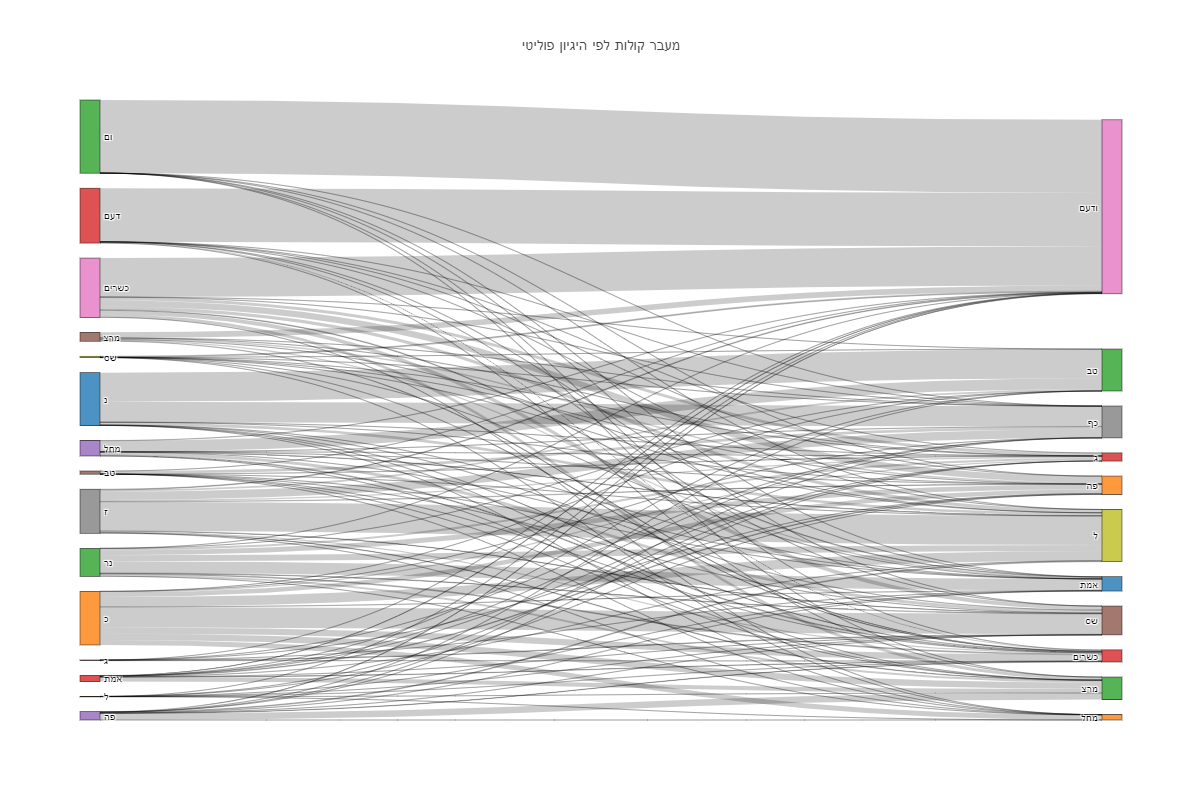

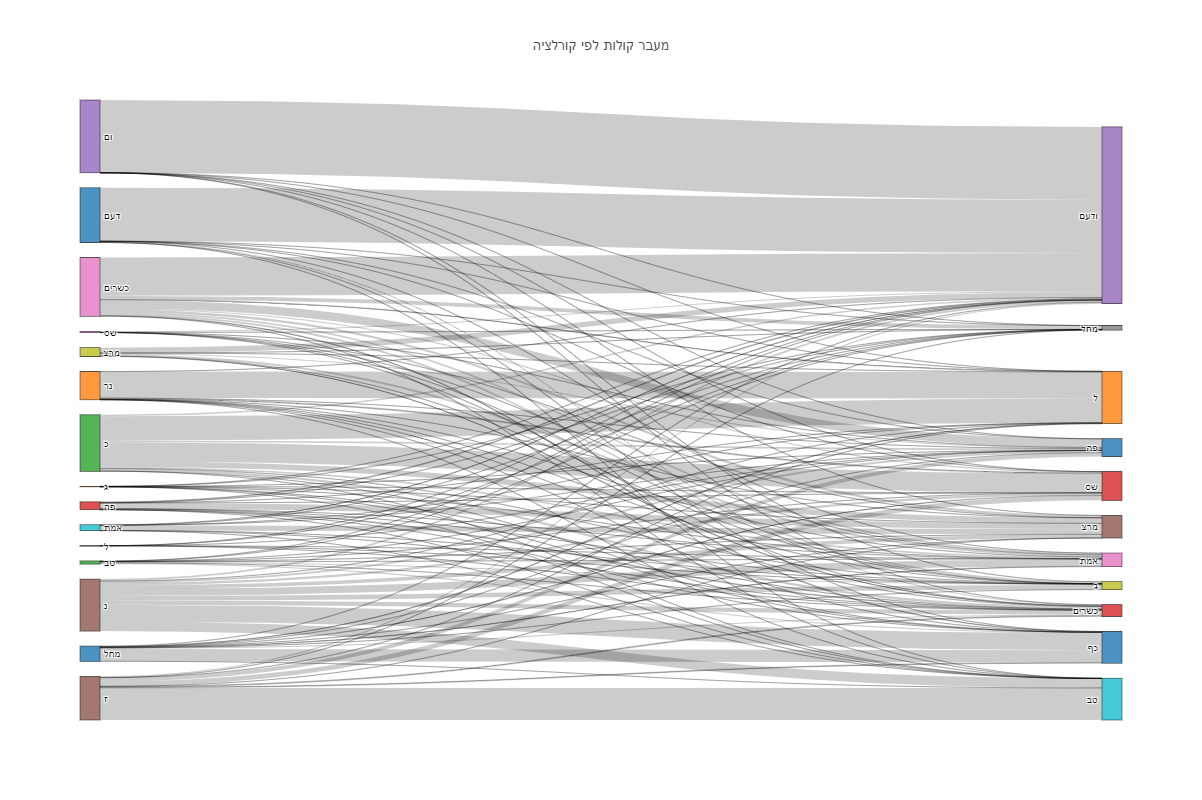

In [51]:
plot_mavar(m1,'מעבר קולות לפי היגיון פוליטי')
plot_mavar(m2,'מעבר קולות לפי קורלציה')

In [52]:
def kalpi_anelize(name):
    print(name)
    index = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20']
    kalpi = pd.DataFrame()
    kalpi[21] = df21.loc[name]
    kalpi[22] = df.loc[name]
    kalpi['שינוי'] = df_analize.loc[name]
    data = [go.Bar(y=kalpi)]
    plot(kalpi)
    kalpi.drop((['בזב','כשרים','מצביעים','סמל ישוב'])).rename(index=lambda x: x[::-1]).plot.bar()

In [53]:
# כעת נעבור לנתח את אחוזי ההצבעה לפי גושים
# החלוקה מתבצעת על סמך ההגדרה שהגדרנו עשירון עליון ישוב בו מפלגה קיבלה מעל מ50% מהקולות ןרבע עליון ישוב בו מפלגה קיבלה מעל 30%
# בנוסף לאחוזי ההצבעה אנחנו בודקים כמה מסך הקולות שקיבלה המפלגה מגיעים מהישובים הללו

In [54]:
def plot( df):
        fig = go.Figure()
        for trace in list(df.columns):
                fig.add_trace(
                    go.bar(x=df.index, y=df[trace], name=trace,)
                )                
        fig.show()


In [55]:
# Index Levels
outside = ['21','21','21','21','22','22','22','22']
inside = ['אחוז מסך הקולות רבע עליון','אחוז הצבעה רבע עליון','אחוז מסך הקולות למפלגה עשירון עליון','אחוז הצבעה עשירון עליון','אחוז מסך הקולות רבע עליון','אחוז הצבעה רבע עליון','אחוז מסך הקולות למפלגה עשירון עליון','אחוז הצבעה עשירון עליון']
hier_index = list(zip(outside,inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

In [56]:
percentage_of_voting = pd.DataFrame(columns=hier_index, index =['maoz_haredim','maoz_kahol','maoz_licud','maoz_zionutdatit'])

In [57]:
percentage_of_voting.loc['maoz_haredim'].loc['21']['אחוז הצבעה עשירון עליון'] = maoz_haredim['כשרים'].sum()/maoz_haredim['בזב'].sum()*100
percentage_of_voting.loc['maoz_haredim'].loc['21']['אחוז מסך הקולות למפלגה עשירון עליון'] = (maoz_haredim['ג'].sum()+maoz_haredim['שס'].sum())/(df21['ג'].sum()+df21['שס'].sum())*100
percentage_of_voting.loc['maoz_haredim'].loc['21']['אחוז הצבעה רבע עליון'] = maoz2_haredim['כשרים'].sum()/maoz2_haredim['בזב'].sum()*100
percentage_of_voting.loc['maoz_haredim'].loc['21']['אחוז מסך הקולות רבע עליון'] = (maoz2_haredim['ג'].sum()+maoz2_haredim['שס'].sum())/(df21['ג'].sum()+df21['שס'].sum())*100

percentage_of_voting.loc['maoz_haredim'].loc['22']['אחוז הצבעה עשירון עליון'] = maoz_haredim22['כשרים'].sum()/maoz_haredim22['בזב'].sum()*100
percentage_of_voting.loc['maoz_haredim'].loc['22']['אחוז מסך הקולות למפלגה עשירון עליון'] = (maoz_haredim22['ג'].sum()+maoz_haredim22['שס'].sum())/(df['ג'].sum()+df['שס'].sum())*100
percentage_of_voting.loc['maoz_haredim'].loc['22']['אחוז הצבעה רבע עליון'] = maoz2_haredim22['כשרים'].sum()/maoz2_haredim22['בזב'].sum()*100
percentage_of_voting.loc['maoz_haredim'].loc['22']['אחוז מסך הקולות רבע עליון'] = (maoz2_haredim22['ג'].sum()+maoz2_haredim22['שס'].sum())/(df['ג'].sum()+df['שס'].sum())*100
# licud
percentage_of_voting.loc['maoz_licud'].loc['21']['אחוז הצבעה עשירון עליון'] = maoz_licud['כשרים'].sum()/maoz_licud['בזב'].sum()*100
percentage_of_voting.loc['maoz_licud'].loc['21']['אחוז מסך הקולות למפלגה עשירון עליון'] = (maoz_licud['מחל'].sum())/(df21['מחל'].sum())*100
percentage_of_voting.loc['maoz_licud'].loc['21']['אחוז הצבעה רבע עליון'] = maoz2_licud['כשרים'].sum()/maoz2_licud['בזב'].sum()*100
percentage_of_voting.loc['maoz_licud'].loc['21']['אחוז מסך הקולות רבע עליון'] = (maoz2_licud['מחל'].sum())/(df21['מחל'].sum())*100

percentage_of_voting.loc['maoz_licud'].loc['22']['אחוז הצבעה עשירון עליון'] = maoz_licud22['כשרים'].sum()/maoz_licud22['בזב'].sum()*100
percentage_of_voting.loc['maoz_licud'].loc['22']['אחוז מסך הקולות למפלגה עשירון עליון'] = (maoz_licud22['מחל'].sum())/(df['מחל'].sum())*100
percentage_of_voting.loc['maoz_licud'].loc['22']['אחוז הצבעה רבע עליון'] = maoz2_licud22['כשרים'].sum()/maoz2_licud22['בזב'].sum()*100
percentage_of_voting.loc['maoz_licud'].loc['22']['אחוז מסך הקולות רבע עליון'] = (maoz2_licud['מחל'].sum())/(df['מחל'].sum())*100
# kachol
percentage_of_voting.loc['maoz_kahol'].loc['21']['אחוז הצבעה עשירון עליון'] = maoz_kahol['כשרים'].sum()/maoz_kahol['בזב'].sum()*100
percentage_of_voting.loc['maoz_kahol'].loc['21']['אחוז מסך הקולות למפלגה עשירון עליון'] = (maoz_kahol['פה'].sum())/(df21['פה'].sum())*100
percentage_of_voting.loc['maoz_kahol'].loc['21']['אחוז הצבעה רבע עליון'] = maoz2_kahol['כשרים'].sum()/maoz2_kahol['בזב'].sum()*100
percentage_of_voting.loc['maoz_kahol'].loc['21']['אחוז מסך הקולות רבע עליון'] = (maoz2_kahol['פה'].sum())/(df21['פה'].sum())*100

percentage_of_voting.loc['maoz_kahol'].loc['22']['אחוז הצבעה עשירון עליון'] = maoz_kahol22['כשרים'].sum()/maoz_kahol22['בזב'].sum()*100
percentage_of_voting.loc['maoz_kahol'].loc['22']['אחוז מסך הקולות למפלגה עשירון עליון'] = (maoz_kahol22['פה'].sum())/(df['פה'].sum())*100
percentage_of_voting.loc['maoz_kahol'].loc['22']['אחוז הצבעה רבע עליון'] = maoz2_kahol22['כשרים'].sum()/maoz2_kahol22['בזב'].sum()*100
percentage_of_voting.loc['maoz_kahol'].loc['22']['אחוז מסך הקולות רבע עליון'] = (maoz2_kahol22['פה'].sum())/(df['פה'].sum())*100
                                                                                 #zionutdatit
percentage_of_voting.loc['maoz_zionutdatit'].loc['21']['אחוז הצבעה עשירון עליון'] = maoz_zionutdatit['כשרים'].sum()/maoz_zionutdatit['בזב'].sum()*100
percentage_of_voting.loc['maoz_zionutdatit'].loc['21']['אחוז מסך הקולות למפלגה עשירון עליון'] = (maoz_zionutdatit['טב'].sum()+maoz_zionutdatit['נ'].sum())/(df21['טב'].sum()+df21['נ'].sum())*100
percentage_of_voting.loc['maoz_zionutdatit'].loc['21']['אחוז הצבעה רבע עליון'] = maoz2_zionutdatit['כשרים'].sum()/maoz2_zionutdatit['בזב'].sum()*100
percentage_of_voting.loc['maoz_zionutdatit'].loc['21']['אחוז מסך הקולות רבע עליון'] = (maoz2_zionutdatit['טב'].sum()+maoz2_zionutdatit['נ'].sum())/(df21['טב'].sum()+df21['נ'].sum())*100

percentage_of_voting.loc['maoz_zionutdatit'].loc['22']['אחוז הצבעה עשירון עליון'] = maoz_zionutdatit22['כשרים'].sum()/maoz_zionutdatit22['בזב'].sum()*100
percentage_of_voting.loc['maoz_zionutdatit'].loc['22']['אחוז מסך הקולות למפלגה עשירון עליון'] = (maoz_zionutdatit22['טב'].sum()+maoz_zionutdatit22['נ'].sum())/(df['טב'].sum()+df['נ'].sum())*100
percentage_of_voting.loc['maoz_zionutdatit'].loc['22']['אחוז הצבעה רבע עליון'] = maoz2_zionutdatit22['כשרים'].sum()/maoz2_zionutdatit22['בזב'].sum()*100
percentage_of_voting.loc['maoz_zionutdatit'].loc['22']['אחוז מסך הקולות רבע עליון'] = (maoz2_zionutdatit22['טב'].sum()+maoz2_zionutdatit22['נ'].sum())/(df['טב'].sum()+df['נ'].sum())*100


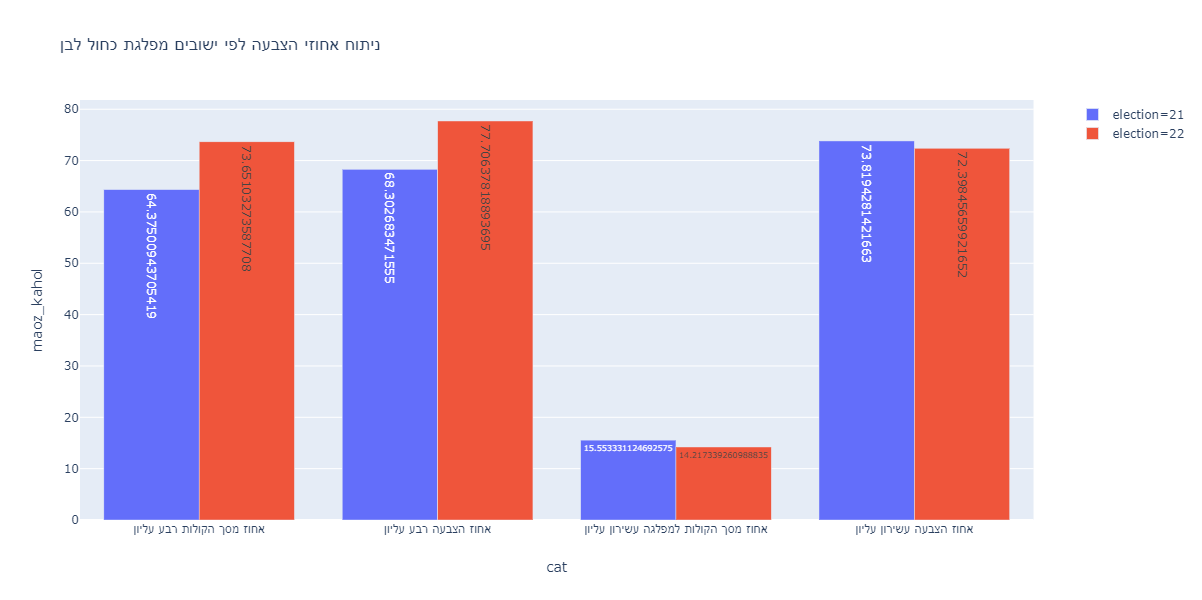

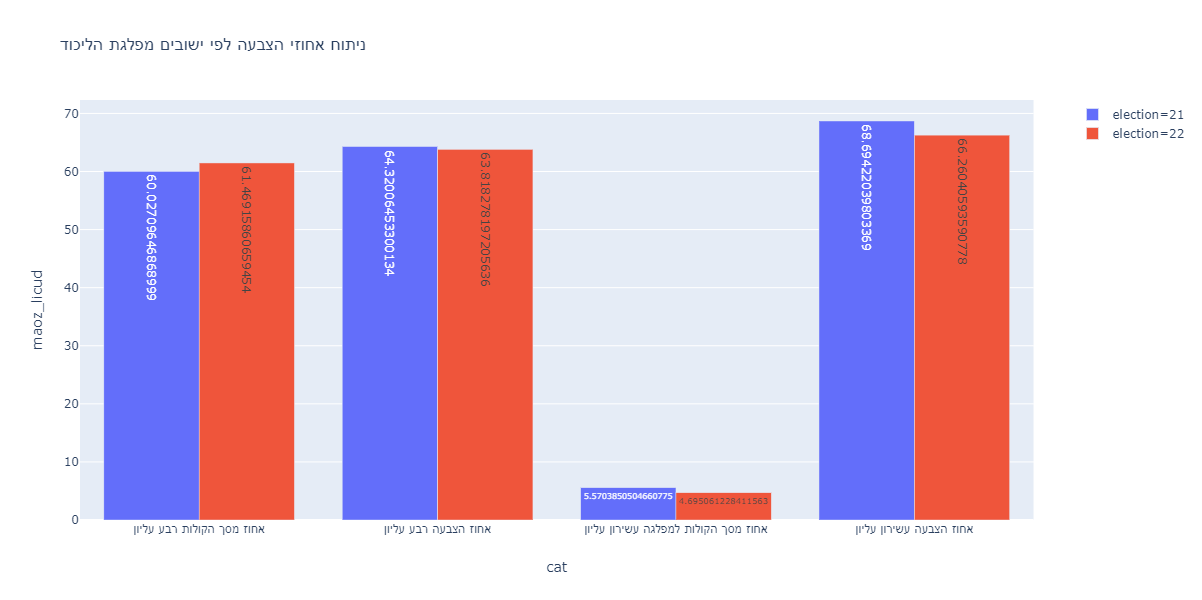

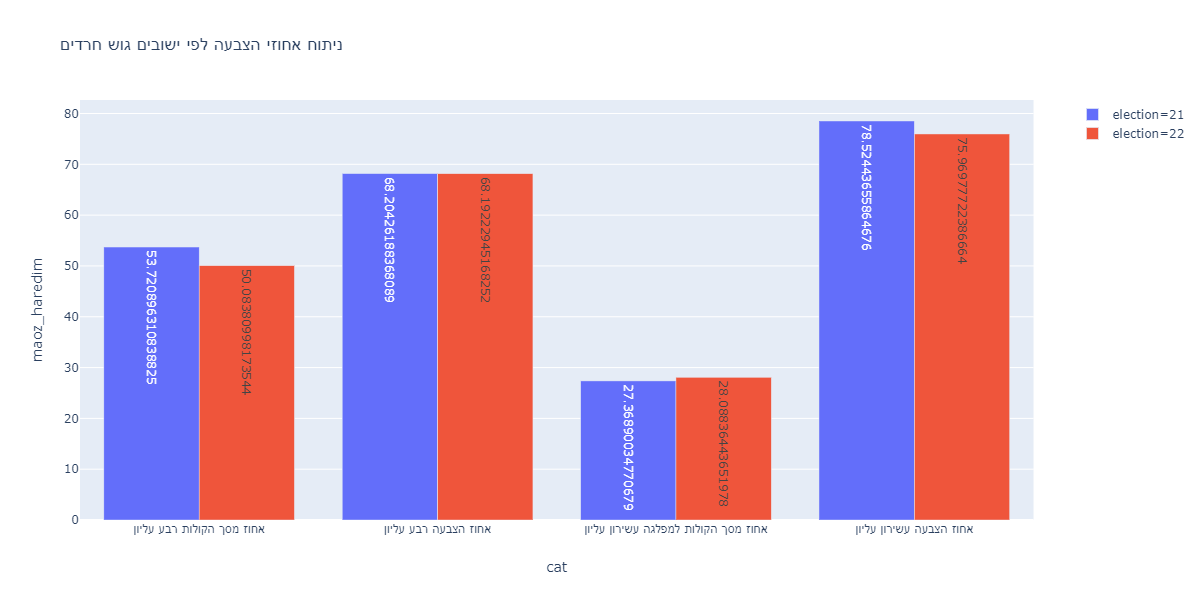

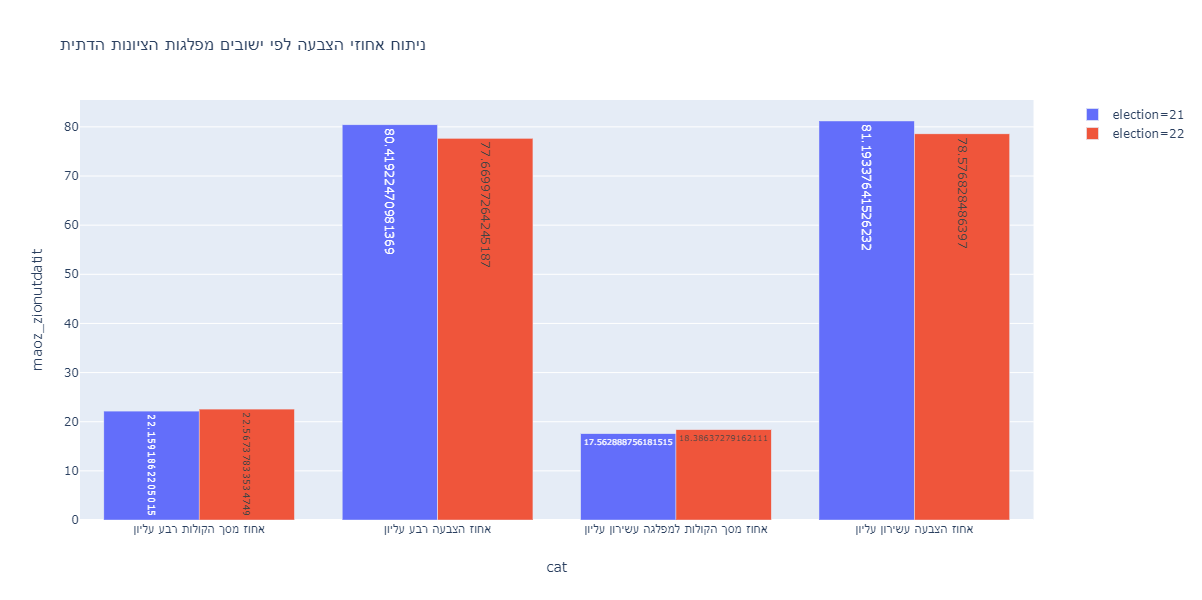

election                                  cat maoz_haredim maoz_kahol  \
0       21            אחוז מסך הקולות רבע עליון      53.7209     64.375   
1       21                 אחוז הצבעה רבע עליון      68.2043    68.3027   
2       21  אחוז מסך הקולות למפלגה עשירון עליון      27.3689    15.5533   
3       21              אחוז הצבעה עשירון עליון      78.5244    73.8194   
4       22            אחוז מסך הקולות רבע עליון      50.0838     73.651   
5       22                 אחוז הצבעה רבע עליון      68.1922    77.7064   
6       22  אחוז מסך הקולות למפלגה עשירון עליון      28.0884    14.2173   
7       22              אחוז הצבעה עשירון עליון      75.9698    72.3985   

  maoz_licud maoz_zionutdatit  
0    60.0271          22.1592  
1    64.3201          80.4192  
2    5.57039          17.5629  
3    68.6942          81.1934  
4    61.4692          22.5674  
5    63.8183            77.67  
6    4.69506          18.3864  
7    66.2604          78.5768

In [83]:
data = percentage_of_voting.T.reset_index()
data.rename(columns = {'level_0' :'election','level_1':'cat' }, inplace =True)
fig = px.bar(data.reset_index(), x='cat', y="maoz_kahol",color = 'election',  barmode="group"
             ,text = 'maoz_kahol',
             title= 'ניתוח אחוזי הצבעה לפי ישובים מפלגת כחול לבן'
#              facet_row="time", facet_col="day",
#              category_orders={"day": ["Thur", "Fri", "Sat", "Sun"],
#                               "time": ["Lunch", "Dinner"]}
            )
fig.show()

fig = px.bar(data.reset_index(), x='cat', y="maoz_licud",color = 'election',  barmode="group"
             ,text = 'maoz_licud',
             title= 'ניתוח אחוזי הצבעה לפי ישובים מפלגת הליכוד'
#              facet_row="time", facet_col="day",
#              category_orders={"day": ["Thur", "Fri", "Sat", "Sun"],
#                               "time": ["Lunch", "Dinner"]}
            )
fig.show()
fig = px.bar(data.reset_index(), x='cat', y="maoz_haredim",color = 'election',  barmode="group"
             ,text = 'maoz_haredim',
             title= 'ניתוח אחוזי הצבעה לפי ישובים גוש חרדים'
#              facet_row="time", facet_col="day",
#              category_orders={"day": ["Thur", "Fri", "Sat", "Sun"],
#                               "time": ["Lunch", "Dinner"]}
            )
fig.show()
fig = px.bar(data.reset_index(), x='cat', y="maoz_zionutdatit",color = 'election',  barmode="group"
             ,text = 'maoz_zionutdatit',
             title= 'ניתוח אחוזי הצבעה לפי ישובים מפלגות הציונות הדתית'
#              facet_row="time", facet_col="day",
#              category_orders={"day": ["Thur", "Fri", "Sat", "Sun"],
#                               "time": ["Lunch", "Dinner"]}
            )
fig.show()
data

In [77]:
p1 =data
p1

election                                  cat maoz_haredim maoz_kahol  \
0       21            אחוז מסך הקולות רבע עליון      53.7209     64.375   
1       21                 אחוז הצבעה רבע עליון      68.2043    68.3027   
2       21  אחוז מסך הקולות למפלגה עשירון עליון      27.3689    15.5533   
3       21              אחוז הצבעה עשירון עליון      78.5244    73.8194   
4       22            אחוז מסך הקולות רבע עליון      50.0838     73.651   
5       22                 אחוז הצבעה רבע עליון      68.1922    77.7064   
6       22  אחוז מסך הקולות למפלגה עשירון עליון      28.0884    14.2173   
7       22              אחוז הצבעה עשירון עליון      75.9698    72.3985   

  maoz_licud maoz_zionutdatit  
0    60.0271          22.1592  
1    64.3201          80.4192  
2    5.57039          17.5629  
3    68.6942          81.1934  
4    61.4692          22.5674  
5    63.8183            77.67  
6    4.69506          18.3864  
7    66.2604          78.5768

In [78]:
p2 = pd.DataFrame()
p2['data'] = p1['cat']
p2['sum'] = p1['maoz_haredim']
p2['miflaga'] ='maoz_haredim' 
p2['election'] =  p1['election']
p3 = pd.DataFrame()
p3['data'] = p1['cat']
p3['sum'] = p1['maoz_licud']
p3['miflaga'] ='maoz_licud' 
p3['election'] =  p1['election']
p4 = pd.DataFrame()
p4['data'] = p1['cat']
p4['sum'] = p1['maoz_kahol']
p4['miflaga'] ='maoz_kahol' 
p4['election'] =  p1['election']
p5 = pd.DataFrame()
p5['data'] = p1['cat']
p5['sum'] = p1['maoz_zionutdatit']
p5['miflaga'] ='maoz_zionutdatit' 
p5['election'] =  p1['election']
p = pd.concat([p2,p3,p4,p5])
p.reset_index(inplace =True,drop = True)
for i in p['sum'].index:
    p['sum'][i] =  round(p['sum'][i] ,2)



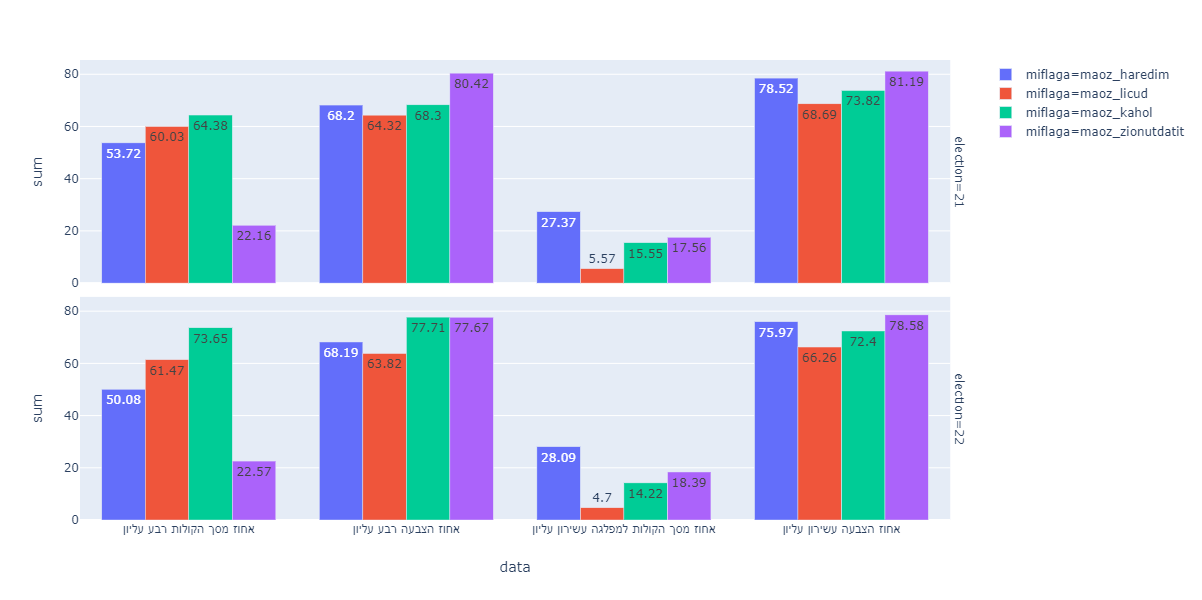

In [79]:
fig = px.bar(p, x='data', y="sum",color = 'miflaga',  barmode="group",
             facet_row="election",
             text = 'sum'
#              category_orders={"day": ["Thur", "Fri", "Sat", "Sun"],
#                               "time": ["Lunch", "Dinner"]}
            )
fig.show()

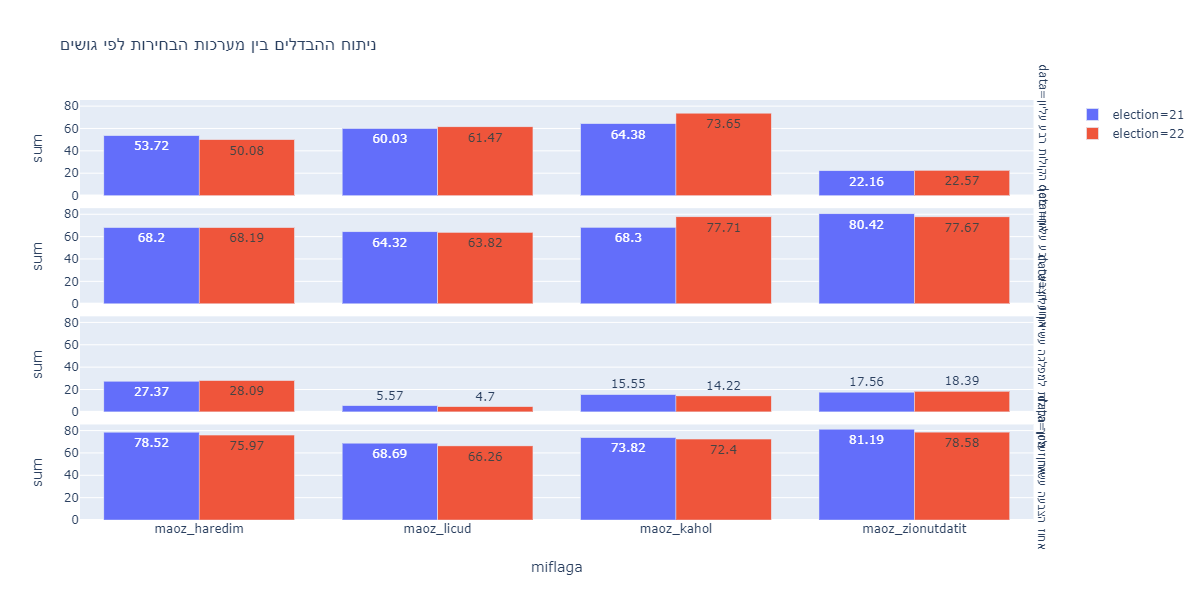

In [80]:
fig = px.bar(p, x='miflaga', y="sum",color = 'election',  barmode="group",
             facet_row="data"
              ,text = 'sum',
             title= 'ניתוח ההבדלים בין מערכות הבחירות לפי גושים'

#              category_orders={"day": ["Thur", "Fri", "Sat", "Sun"],
#                               "time": ["Lunch", "Dinner"]}
            )
fig.show()

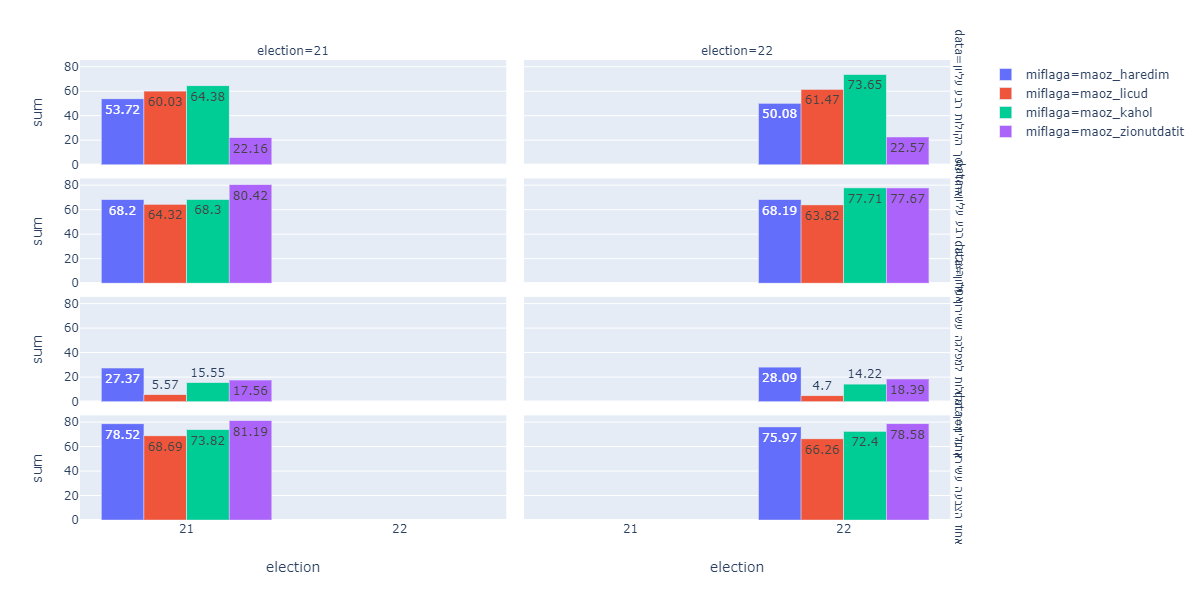

In [81]:
fig = px.bar(p, x='election', y="sum",color = 'miflaga',  barmode="group",
             facet_row="data" ,facet_col='election',
                          text = 'sum'

#              category_orders={"day": ["Thur", "Fri", "Sat", "Sun"],
#                               "time": ["Lunch", "Dinner"]}
            )
fig.show()

In [82]:
# לסיכום ניתן לראות שלליכוד אחוזי הצבעה נמוכים משמעותית משאר הגושים וגם שסך הקולות שהוא קיבל בעשירון העליון נמוך בייחס לשאר המפלגות
# כמו כן לליכוד הייתה ירידה באחוזי ההצבעה במעוזים שלו בבחירות לכנסת ה22 בעוד שלכחול לבן הייתה עלייה גדולה של 9% בין מערכות הבחירות